<a href="https://colab.research.google.com/github/Tosinoladejo1/Binary_Classification_Project/blob/main/CNNSkeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting global seed

In [102]:
import os
import tensorflow as tf
import numpy as np
import random

# Set a seed value
seed_value = 25

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED'] = str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)



# Importing the libraries

In [104]:
# TODO: Import other necessary libraries
from google.colab import drive
drive.mount ('/content/drive')
from keras.preprocessing. image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras. layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
import matplotlib.pyplot as plt
from PIL import Image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the dataset

In [121]:
# TODO: Populate the create_image_generators() function
def create_image_generators(train_dir, target_size=(150, 150), batch_size=20, val_split=0.2):
    """
    Create training and validation generators for image data.

    Parameters:
    - base_dir: Path to the base directory where the 'train' folder is located.
    - target_size: Tuple of integers, the dimensions to which all images found will be resized.
    - batch_size: Integer, size of the batches of data.
    - val_split: Float, the fraction of images reserved for validation.

    Returns:
    - train_generator: Training data generator.
    - validation_generator: Validation data generator.
    """

    # TODO: Creating Image Data Generator for both training and validation
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=val_split
        )

    # TODO: Create a training data generator
    train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training',

    )
    # TODO: Create a validation data generator
    validation_generator = datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation',


    )

    return train_generator, validation_generator

train_dir = '/content/drive/My Drive/cnn_data/train/'
train_generator, validation_generator = create_image_generators(train_dir)

Found 148 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


In [122]:
def print_generator_info(generator):
    """
    Print information about a data generator.

    Parameters:
    - generator: The data generator (train or validation).
    """
    # Number of images
    num_images = generator.samples
    # Batch size
    batch_size = generator.batch_size
    # Class indices
    class_indices = generator.class_indices
    # Number of classes
    num_classes = generator.num_classes
    # Filenames
    filenames = generator.filenames

    print(f"Number of images: {num_images}")
    print(f"Batch size: {batch_size}")
    print(f"Class indices: {class_indices}")
    print(f"Number of classes: {num_classes}")
    print(f"Number of filenames loaded: {len(filenames)}")  # Number of filenames might be large

# Example usage:
print("Training Generator Info:")
print_generator_info(train_generator)
print("\nValidation Generator Info:")
print_generator_info(validation_generator)


Training Generator Info:
Number of images: 148
Batch size: 20
Class indices: {'not_polar': 0, 'polar': 1}
Number of classes: 2
Number of filenames loaded: 148

Validation Generator Info:
Number of images: 36
Batch size: 20
Class indices: {'not_polar': 0, 'polar': 1}
Number of classes: 2
Number of filenames loaded: 36


# Define the CNN model

In [125]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
# Print the model summary
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 82944)             0         
                                                                 
 dropout_4 (Dropout)         (None, 82944)            

In [124]:
total_params = model.count_params()
print(f"Total number of parameters: {total_params}")

Total number of parameters: 42487745


# Compile and fit the CNN model

In [126]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
8/8 [==============================] - 18s 2s/step - loss: 2.9884 - accuracy: 0.5068 - val_loss: 0.5584 - val_accuracy: 0.6944
Epoch 2/20
8/8 [==============================] - 14s 2s/step - loss: 0.5673 - accuracy: 0.7297 - val_loss: 0.4172 - val_accuracy: 0.9167
Epoch 3/20
8/8 [==============================] - 14s 2s/step - loss: 0.4599 - accuracy: 0.8243 - val_loss: 0.3606 - val_accuracy: 0.8889
Epoch 4/20
8/8 [==============================] - 14s 2s/step - loss: 0.4072 - accuracy: 0.8311 - val_loss: 0.2106 - val_accuracy: 0.9167
Epoch 5/20
8/8 [==============================] - 14s 2s/step - loss: 0.4161 - accuracy: 0.8311 - val_loss: 0.4610 - val_accuracy: 0.8056
Epoch 6/20
8/8 [==============================] - 14s 2s/step - loss: 0.3125 - accuracy: 0.8649 - val_loss: 0.1686 - val_accuracy: 0.9444
Epoch 7/20
8/8 [==============================] - 15s 2s/step - loss: 0.3263 - accuracy: 0.8649 - val_loss: 0.2397 - val_accuracy: 0.8611
Epoch 8/20
8/8 [==================

# Plot Training and Validation accuracies

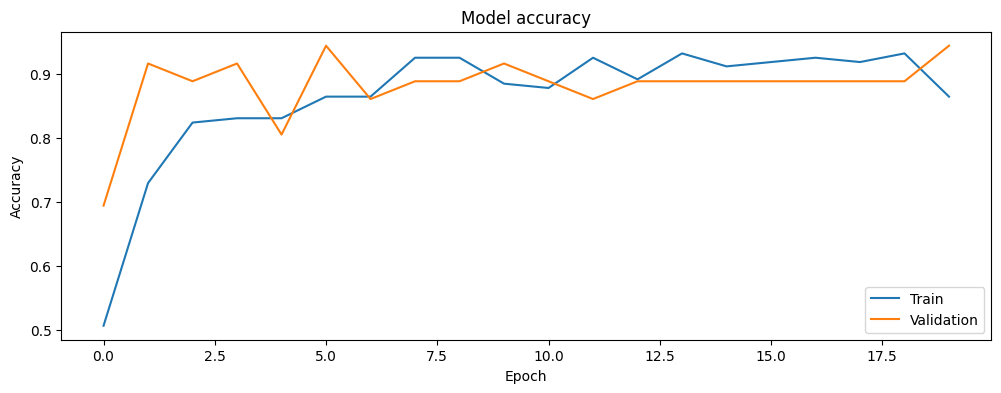

In [130]:
# TODO: Plot training & validation accuracy values
plt. figure (figsize=(12, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title( 'Model accuracy')
plt.ylabel ( 'Accuracy')
plt.xlabel( 'Epoch')
plt.legend( ['Train', 'Validation'])
plt.show()

# Plot Training and Validation losses

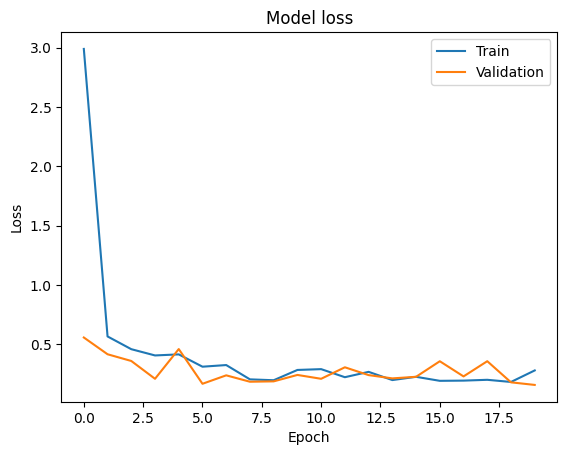

In [133]:
# TODO: Plot training & validation accuracy losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title( 'Model loss')
plt.ylabel('Loss')
plt.xlabel( 'Epoch')
plt. legend(['Train', 'Validation'])
plt. show()

# Testing


In [138]:
def load_display_predict_image(img_path, model, size=(150, 150)):
    """
    Load, preprocess, display, and predict the class of an image using a given model.

    Parameters:
    - img_path: String, path to the image file.
    - model: TensorFlow/Keras model that will be used to predict the image.
    - size: Tuple of integers, target size of the image (height, width).
    """
    # Load an image file to PIL format, target size can be adjusted
    img = Image.open(img_path).resize(size).convert('RGB')

    # Convert the PIL image to a numpy array
    img_array = np.array(img)

    # Expand the dimensions of the array to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=0) # Removed one extra expansion

    # Normalize the image pixels to [0, 1]
    img_array = img_array / 255.0

    # Predict the class of the image
    prediction = model.predict(img_array)

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Predict using the provided model
    prediction = model.predict(img_array)

    print(prediction)
    print("Polar Bear" if prediction[0][0] > 0.5 else "Not Polar Bear")

## Inference for test_1.jpg

1/1 [==============================] - 0s 117ms/step


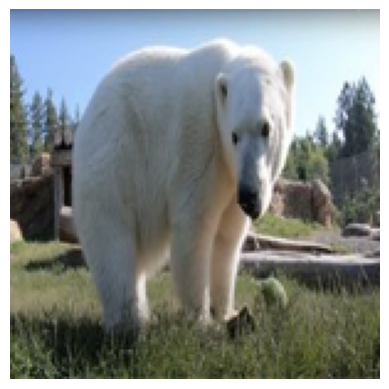

1/1 [==============================] - 0s 63ms/step
[[0.17912695]]
Not Polar Bear


In [139]:
img_path = '/content/drive/My Drive/test_1.jpg'
load_display_predict_image(img_path, model)



## Inference for test_2.jpg

1/1 [==============================] - 0s 52ms/step


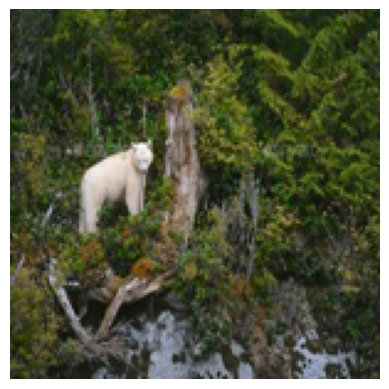

1/1 [==============================] - 0s 77ms/step
[[0.00342095]]
Not Polar Bear


In [140]:
img_path = '/content/drive/My Drive/test_2.jpg'
load_display_predict_image(img_path, model)

## Inference for test_3.jpg

1/1 [==============================] - 0s 54ms/step


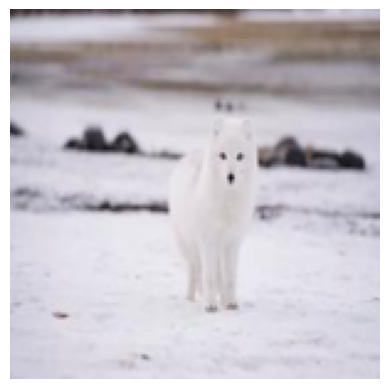

1/1 [==============================] - 0s 57ms/step
[[0.97978574]]
Polar Bear


In [141]:
img_path = '/content/drive/My Drive/test_3.jpg'
load_display_predict_image(img_path, model)

## Inference for test_4.jpg

1/1 [==============================] - 0s 115ms/step


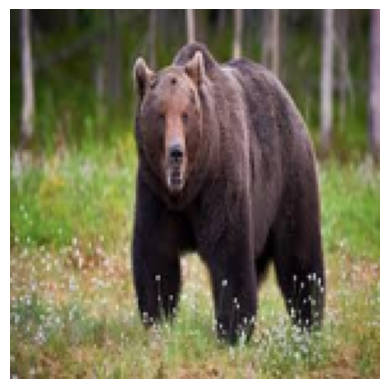

1/1 [==============================] - 0s 69ms/step
[[0.00010717]]
Not Polar Bear


In [142]:
img_path = '/content/drive/My Drive/test_4.jpg'
load_display_predict_image(img_path, model)

## Inference for test_5.jpg

1/1 [==============================] - 0s 49ms/step


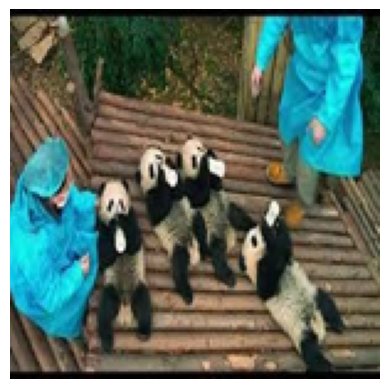

1/1 [==============================] - 0s 69ms/step
[[0.00102276]]
Not Polar Bear


In [143]:
img_path = '/content/drive/My Drive/test_5.jpg'
load_display_predict_image(img_path, model)

## Inference for test_6.jpg

1/1 [==============================] - 0s 49ms/step


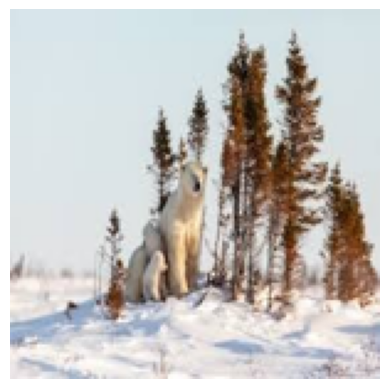

1/1 [==============================] - 0s 47ms/step
[[0.3613118]]
Not Polar Bear


In [144]:
img_path ='/content/drive/My Drive/test_6.jpg'
load_display_predict_image(img_path, model)

# Visualize layer activations

In [145]:
# Load and preprocess an image
def load_image(img_path, size=(150,150)):
    img = image.load_img(img_path, target_size=size)
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    return img_tensor

# Define a function to display the activations
def display_layer_activations(activations, model):
    layer_names = [layer.name for layer in model.layers[:4]]
    images_per_row = 16

    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image = np.maximum(channel_image, 0) / max(channel_image.std(), 1e-5)
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()

1/1 [==============================] - 0s 70ms/step


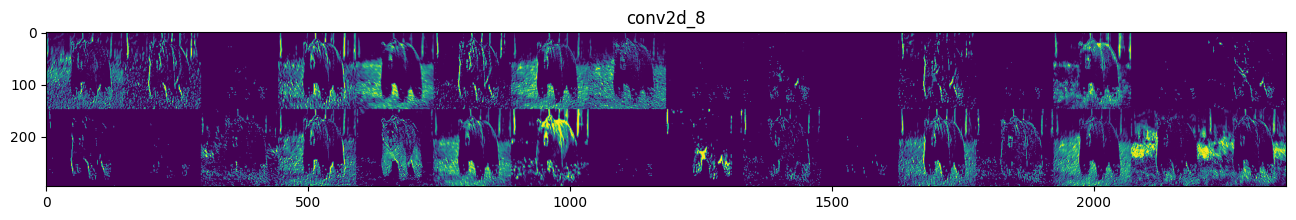

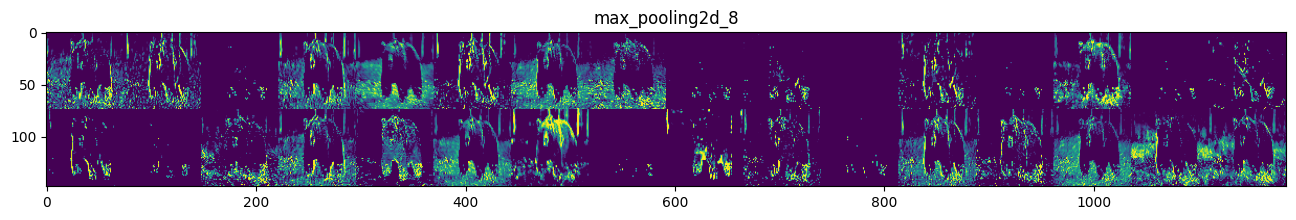

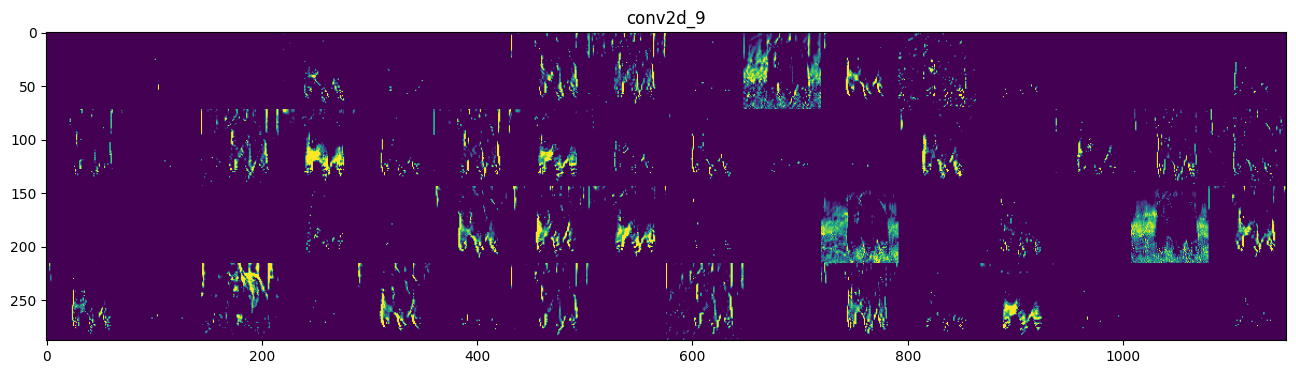

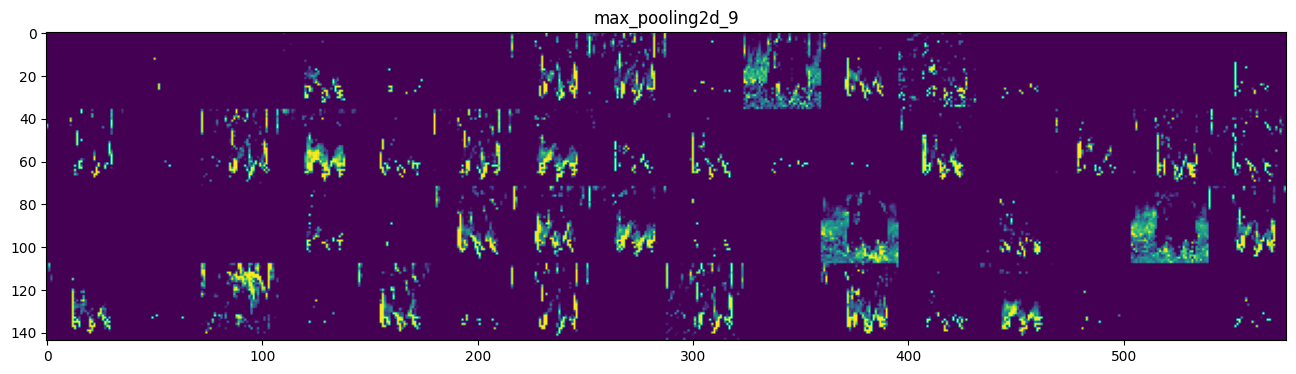

In [147]:
# TODO: Define a function to create a model that returns output from each layer
def get_layer_outputs(model, img_tensor):
    # Extracts outputs for all layers up to the last MaxPooling layer (index 3)
    layer_outputs = [layer.output for layer in model.layers[:4]]

    # Creates a new model that will return these outputs, given the model input
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

    # Returns a list of numpy arrays, one array per layer activation
    activations = activation_model.predict(img_tensor)
    return activations


# Load and preprocess an image
img_path = '/content/drive/My Drive/test_4.jpg'
new_image = load_image(img_path)

# Get activations and display them
activations = get_layer_outputs(model, new_image)
display_layer_activations(activations, model)